#REGRESSION LASSO

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


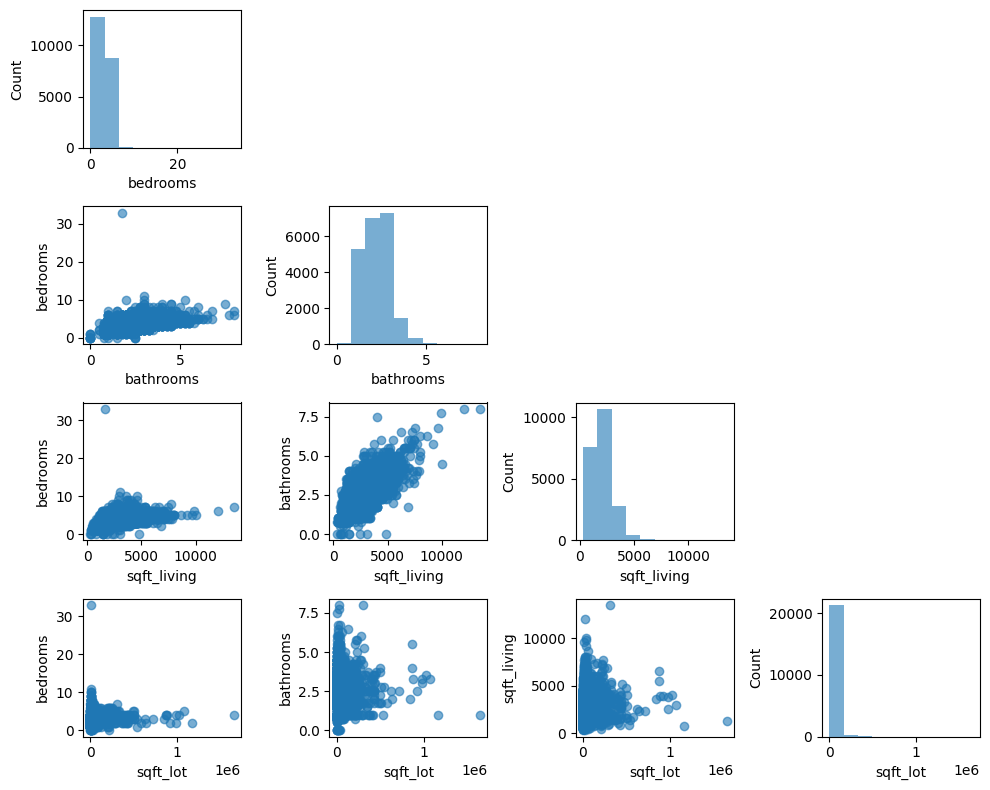

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols=["bedrooms", "bathrooms","sqft_living", "sqft_lot"]
scatterplotmatrix(df[cols].values, figsize=(10,8),
                  names=cols, alpha=0.6)
plt.tight_layout()
plt.show()

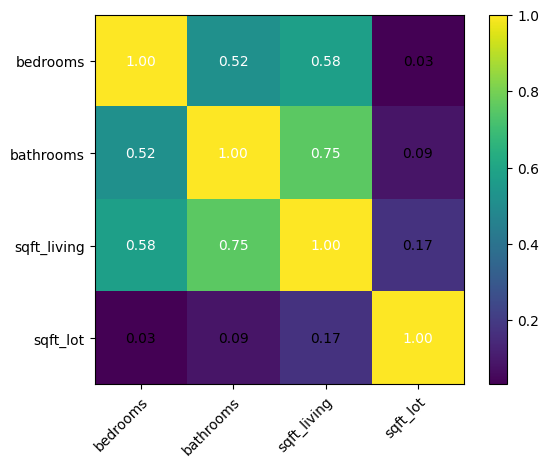

In [ ]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [ ]:
x=df.iloc[:, :1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, random_state=0)

In [ ]:
x_train.shape

(16209, 1)

In [ ]:
y_train.shape

(16209,)

In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=1.0)

lasso.fit(x_train, y_train)

Lasso()

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
y_pred

array([17013.41148857, 15983.98949038, 15259.49604681, ...,
        9389.52826506,  9855.49557712, 10371.63711172])

In [ ]:
print("Slope: %f" % lasso.coef_[0])

Slope: -0.000001


In [ ]:
print("Intercept: %.2f" % lasso.intercept_)

Intercept: 18953.08


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

724540967.7982266

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

26917.298672010656

In [ ]:
print("Rsquared: %.2f" % lasso.score(x_test, y_test))

Rsquared: 0.02


In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

#REGRESSION LOGISTIQUE

## Step1-Import Librairies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

##Step2- Create the Data

In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0,0,0,0, 1,1,1,1,1,1])

In [ ]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


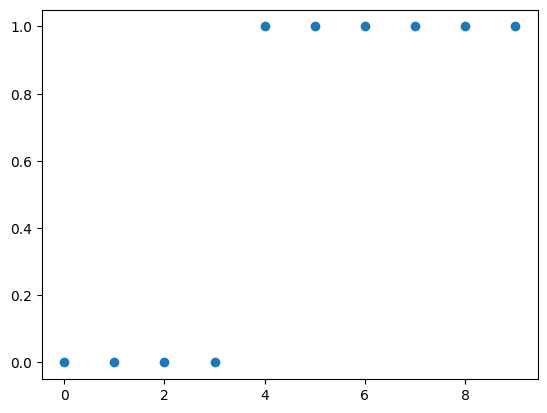

In [ ]:
plt.scatter(x,y)

##Step3- Build a Logistic Regression model for classification

In [ ]:
from  sklearn.linear_model import LogisticRegression
model = LogisticRegression()

##Step4- Train the model

In [ ]:
model.fit(x,y)

LogisticRegression()

In [ ]:
#Retrouver les coefficients et l'ordonnée à l'origine
print(model.coef_)
print(model.intercept_)

[[1.18109091]]
[-4.12617727]


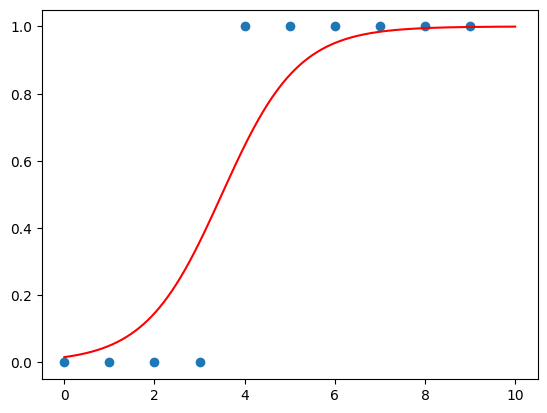

In [ ]:
ordonne = np.linspace(0,10,1000)
plt.scatter(x,y)
plt.plot(ordonne, 1/(1+np.exp(-model.coef_[0][0]*ordonne-model.intercept_[0])), color='r')

##Step5 Evaluation

In [ ]:
y_predict = model.predict(x)
print(y_predict)

[0 0 0 0 1 1 1 1 1 1]


In [ ]:
from  sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, y_predict)

array([[4, 0],
       [0, 6]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y, y_predict).ravel()
print(tn, fp, fn, tp)

4 0 0 6


In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#K.N.N

In [ ]:
#importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

In [ ]:
#Charger le dataset digits
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

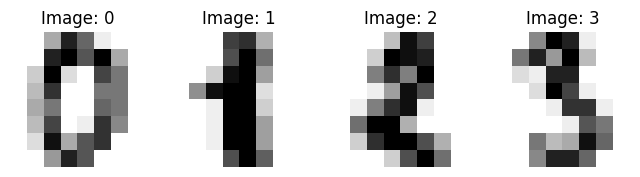

In [ ]:
#Visualiser images et target
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,8) )
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Image: %i" % label)


In [ ]:
#Diviser le dataset en jeu d'apprentissage et jeu de test
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#creer le modele KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Le taux de precision
score = knn.score(X_test, y_test)
print('score: %f' % score)

score: 0.980556


In [ ]:
#Tester k de 1 à 20
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
print(test_accuracy)

[0.98611111 0.98333333 0.98333333 0.98333333 0.98333333 0.97777778
 0.98055556 0.975      0.98055556 0.98055556 0.97777778 0.975
 0.975      0.975      0.97777778 0.97222222 0.975      0.975
 0.975      0.96944444]


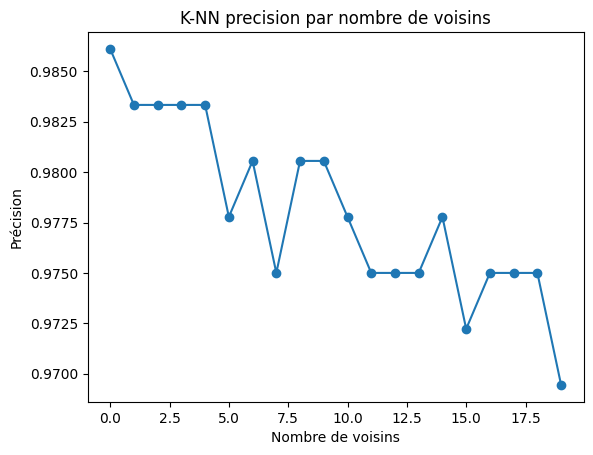

In [ ]:
#Visualisation taux de precision (Test)
plt.plot(test_accuracy, 'o-')
plt.title('K-NN precision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

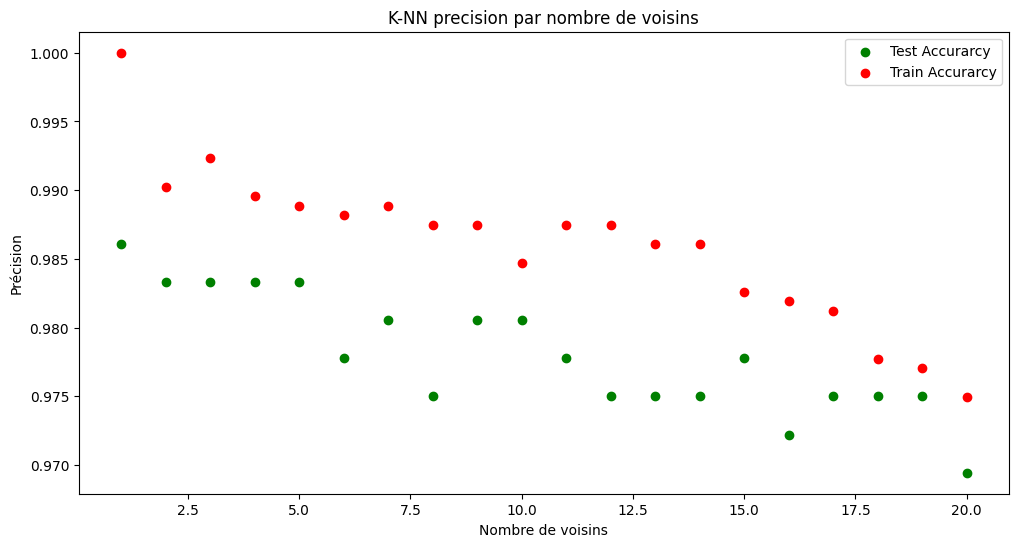

In [ ]:
#Visualisation du taux d'apprentissage et du test
plt.figure(figsize=(12,6))
plt.title('K-NN precision par nombre de voisins')
plt.scatter(neighbors, test_accuracy, label= 'Test Accurarcy', color="green")
plt.scatter(neighbors, train_accuracy, label= 'Train Accurarcy', color="red")
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1, 32]])

In [ ]:
np.bincount(y_test)

array([28, 43, 44, 31, 42, 35, 36, 34, 32, 35])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris=pd.read_csv("/content/Iris (1).csv")

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


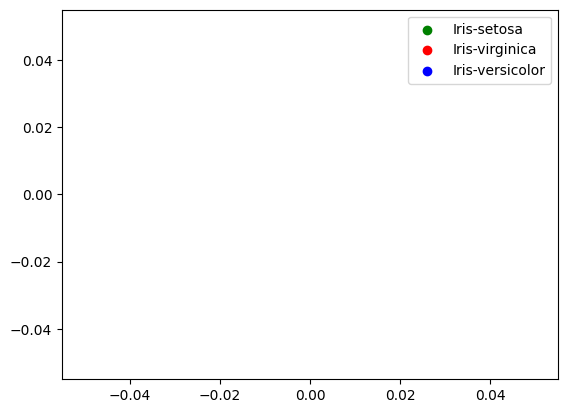

In [ ]:
x=iris.loc[:,"PetalLengthCm"]
y=iris.loc[:,"PetalWidthCm"]
lab=iris.loc[:,"Species"]
plt.scatter(x[lab == 0], y[lab == 0], color='g', label='Iris-setosa')
plt.scatter(x[lab == 1], y[lab == 1], color='r', label='Iris-virginica')
plt.scatter(x[lab == 2], y[lab == 2], color='b', label='Iris-versicolor')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 #traitement CSV
iris=pd.read_csv("/content/Iris (1).csv")
x=iris.loc[:,"PetalLengthCm"]
y=iris.loc[:,"PetalWidthCm"]
lab=iris.loc[:,"Species"]
#fin traitement CSV

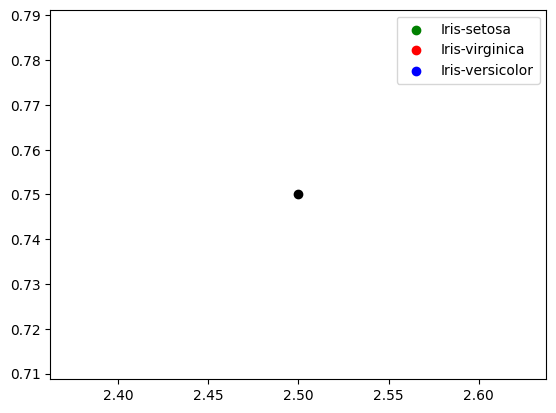

In [ ]:

#valeurs
longueur=2.5
largeur=0.75
k=3
#fin valeurs
#graphique
plt.scatter(x[lab == 0], y[lab == 0], color='g', label='Iris-setosa')
plt.scatter(x[lab == 1], y[lab == 1], color='r', label='Iris-virginica')
plt.scatter(x[lab == 2], y[lab == 2], color='b', label='Iris-versicolor')
plt.scatter(longueur, largeur, color='k')
plt.legend()
#fin graphique

In [ ]:
#algo knn
d=list(zip(x,y))
model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,lab)
prediction= model.predict([[longueur,largeur]])
#fin algo knn

In [ ]:
#Affichage résultats
txt="Résultat : "
if prediction[0]==0:
  txt=txt+"setosa"
  if prediction[0]==1:
    txt=txt+"virginica"
    if prediction[0]==2:
      txt=txt+"versicolor"

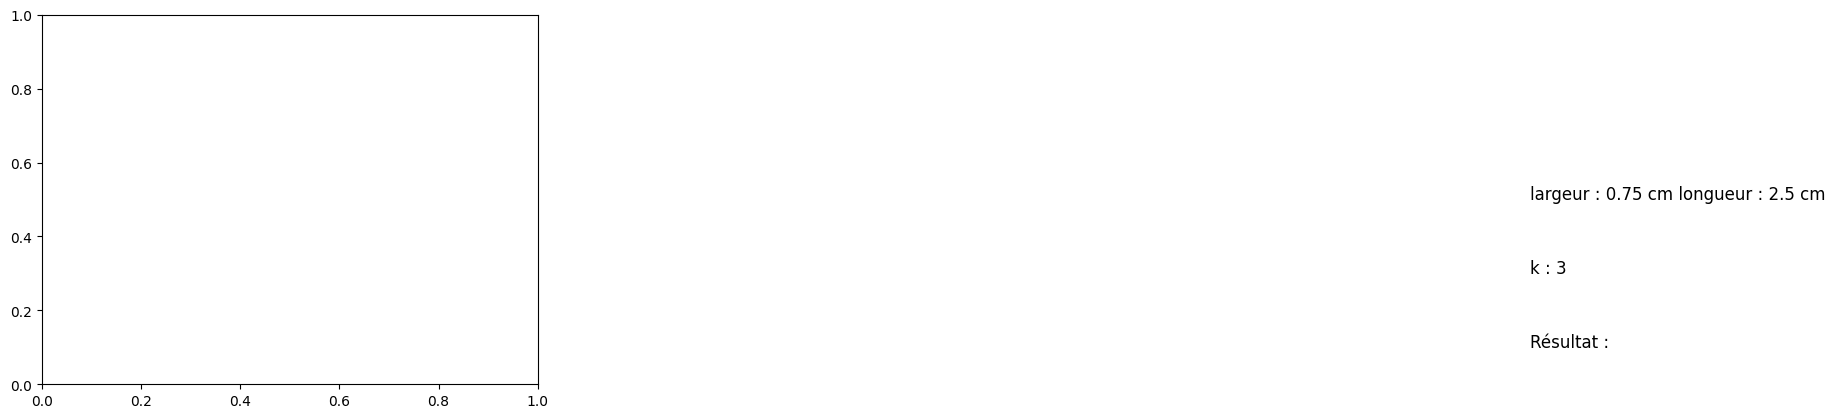

In [ ]:
plt.text(3,0.5, f"largeur : {largeur} cm longueur : {longueur} cm", fontsize=12)
plt.text(3,0.3, f"k : {k}", fontsize=12)
plt.text(3,0.1, txt, fontsize=12)
#fin affichage résultats
plt.show()


#SVM

In [ ]:
#importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#import dataset
data  = pd.read_csv('/content/bill_authentication.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#Aperçu des données
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,1


In [ ]:
data.shape

(1372, 5)

In [ ]:
#Diviser les données en jeu d'entrainement et jeu de test
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.2)

In [ ]:
#Créer le modele SVM
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#prediction sur le Test set
y_pred = classifier.predict(x_test)

In [ ]:
#Matrice de confusion
confusion_matrix(y_test, y_pred)

array([[154,   4],
       [  4, 113]])

In [ ]:
#Rapport de classification
from  sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.97      0.97      0.97       117

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



##Load data CSV files

In [ ]:
#import dataset
cell_data  = pd.read_csv('/content/cell_samples.csv')

In [ ]:
cell_data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
cell_data.shape

(699, 11)

In [ ]:
cell_data.size

7689

In [ ]:
cell_data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [ ]:
cell_data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

##Distribustion of the classes

<Axes: xlabel='Clump', ylabel='UnifSize'>

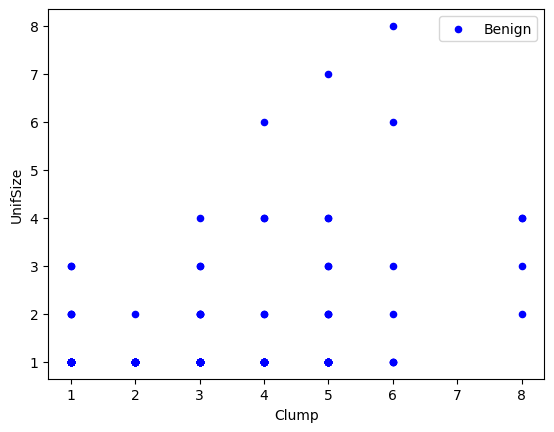

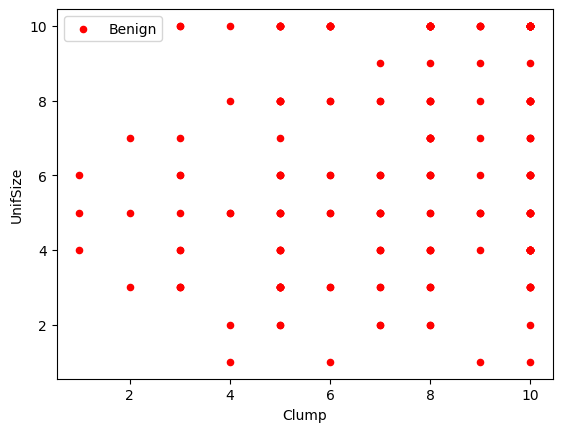

In [ ]:
benign_data = cell_data[cell_data['Class']==2][0:200]
malignant_data = cell_data[cell_data['Class']==4][0:200]

benign_data.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_data.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benign')

#help(benign_data.plot)

<Axes: xlabel='Clump', ylabel='UnifSize'>

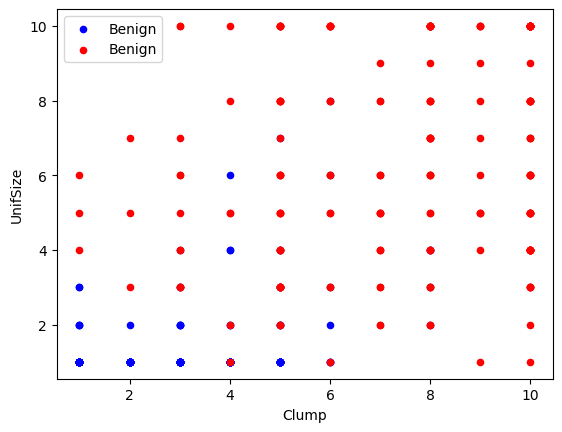

In [ ]:
axes= benign_data.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_data.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benign', ax=axes)


##Identify unwanted rows

In [ ]:
cell_data.dtypes

cell_data=cell_data[pd.to_numeric(cell_data['BareNuc'], errors='coerce').notnull()]
cell_data['BareNuc'] = cell_data['BareNuc'].astype('int')
cell_data.dtypes

<ipython-input-19-62023c0764dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data['BareNuc'] = cell_data['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

##Remove unwanted columns

In [ ]:
cell_data.columns

feature_data= cell_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#cell_data 100rows and 11 columns,
#picked 9 columns out of 11
#Independent for
x = np.asarray(feature_data)

#dependent variable
y= np.asarray(cell_data['Class'])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
y[0:5]

array([2, 2, 2, 2, 2])

##Divide the data as Train/Test dataset

In [ ]:
'''
cell_data--
Train/Test
Train(x,y)##  x itself is a 20 array.## y is 1D
Test(x,y)
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#K-Means

#CLustering

#Arbres de Decisions

#Le Bagging

In [ ]:
#Commençons par créer un jeu de données d'exemple, à l'aide de la fonction  make_moons

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)
#On sépare ensuite le jeu de données en données d'entraînement et données test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
#On peut maintenant créer notre modèle de bagging à l'aide de la fonction  BaggingClassifier  .
# Par défaut, le classifieur de base utilisé par Scikit learn est un arbre de décision donc inutile
#de le préciser. En revanche, on précise le nombre de classifieurs individuels utilisés (en l'occurence 5).

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)
#On va maintenant afficher les différentes zones de classifications des arbres ainsi que du bagging
#de ces arbres. Pour cela j'ai utilisé deux fonctions d'affichage :
# plot_tree_partition  et  plot_2d_separator  disponibles ici.


BaggingClassifier(n_estimators=5)

In [ ]:
#Le plus simple est d'installer le packagemglearnavec la commande:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.9 MB/s eta 0:00:00


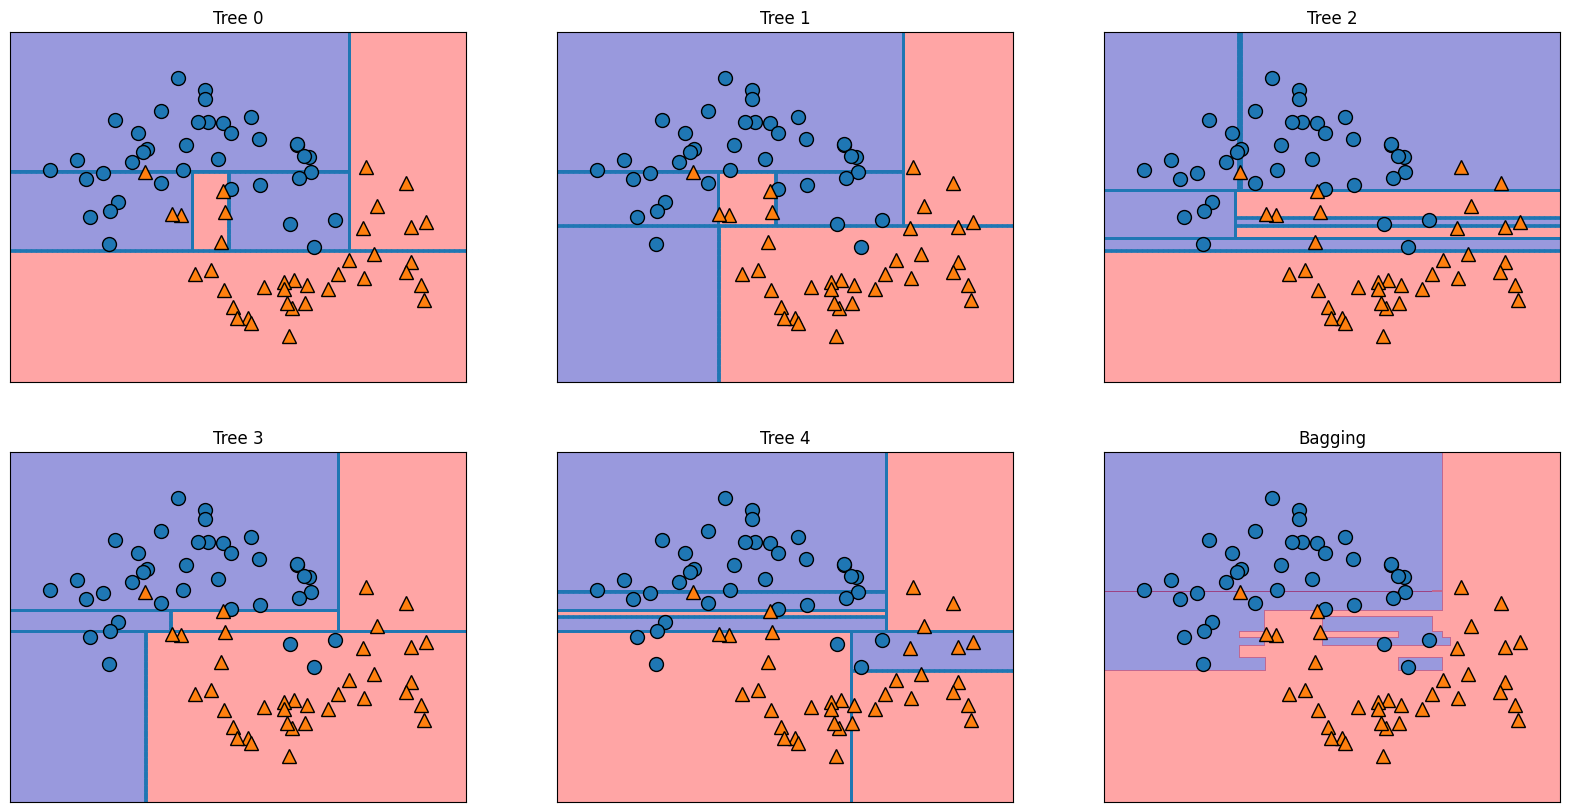

In [ ]:
#Puis d'importer les fonctions:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
#Enfin, on obtient:

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

#Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("/content/train.csv")
test  = pd.read_csv("/content/test.csv")

In [ ]:
print(train.shape)

(639, 563)


In [ ]:
print(test.shape)

(638, 563)


In [ ]:
#Regardons tout d'abord s'il existe des valeurs manquantes :

train.isna().sum()

In [ ]:
#Nous allons d'abord supprimer les valeurs manquantes de la target

train = train.loc[train.Activity.notna()]

In [ ]:
#Ensuite nous allons imputer les valeurs manquantes par la médiane.

train = train.fillna(train.median(), inplace=True)

<ipython-input-38-45c6b8b5e518>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median(), inplace=True)


In [ ]:
#Vérifions que les données ne contiennent plus de valeurs manquantes :
train.isna().sum().sum()

In [ ]:
#Faites, au besoin, la même chose pour le test, et enfin séparons X et y pour le train et pour le test.

X_train = train[train.columns[:-2]]
y_train = train['Activity']

X_test = test[test.columns[:-2]]
y_test = test['Activity']

On va d'abord éliminer les features redondantes (intuitivement, les coordonnées polaires et cartésiennes doivent être corrélées par exemple ... ) Une première manière de faire serait de réfléchir et se renseigner sur le domaine d'études en question pour pouvoir éliminer des variables qui transmettent des informations similaires où n'influencent pas ou très peu la prédiction que l'on veut effectuer.

La seconde manière est d'utiliser justement une forêt aléatoire (!) de laquelle on va extraire l'importance des features qui la constituent, et ainsi déterminer quelles sont les features les plus importantes à partir de ça.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, oob_score=True)

In [ ]:
#On peut maintenant entraîner notre modèle sur les données brutes, sans autre forme de procès.

model = rfc.fit(X_train, y_train)

In [ ]:
#Voyons les  performances de ce modèle sur le jeu de données d'entraînement

from sklearn.metrics import accuracy_score

pred = rfc.predict(X_test)
print("accuracy {:.2f}".format(accuracy_score(y_test, pred)))

accuracy 0.96


Maintenant que notre modèle est créé, on peut effectuer une sélection des features les plus importantes. Pour cela on va utiliser la fonction  SelectFromModel  qui utilise la propriété du modèle qu'on vient de créer  model.feature_importances_  qui permet d'évaluer l'importance relative des features fournies à la base (sur une échelle de 0 à 1). Intuitivement, cette importance est calculée en considérant que plus une feature est haute, plus elle contribue à une fraction plus élevée du jeu de donnée d'entraînement et donc des données au global. On considère donc qu'elle a plus d'importance que les features plus bas dans l'arbre. Cette fraction est utilisée comme estimateur de l'importance de la feature dans cet arbre, qu'on peut ensuite généraliser à la forêt entière.

Si on a peu de features, on pourrait les afficher sur un histogramme afin d'évaluer à l'œil si il n'y a pas déjà une sélection à faire.

Donc en utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.

In [ ]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfc, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

(75, 2)


On a divisé par 5 le nombre de features utilisées, pas mal mais voyons si les performances restent similaires. À l'aide de l'argument threshold, on peut choisir le seuil d'importance que l'on souhaite pour les features à sélectionner.  On calcule en même temps le gain de temps car c'est ce qui nous intéresse principalement dans l'amélioration des performances.


In [ ]:
import timeit

rfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)

start_time = timeit.default_timer()

rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)

pred = rfc2.predict(X_test2)
elapsed = timeit.default_timer() - start_time
accuracy = accuracy_score(y_test, pred)

print("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))

accuracy 0.96 time 1.68s


On a donc plus que divisé par trois le temps de calcul, sans trop perdre en performances ! C'est plus que respectable pour un premier jet.

Conclusion

A vous maintenant de bidouiller afin d'améliorer les performances du modèle finale en modifiant les différents hyperparamètres de contrôle et trouver la bonne balance entre performances de classification / temps de calcul. Bien sûr le ratio souhaité dépendra de la problématique : est-ce qu'on veut une très bonne performance et peu importe le temps de calcul, ou bien un temps de calcul le plus rapide possible mais avec une performance minimum etc etc

#Gridsearch

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, random_state =69)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
hyperparametres= {'n_neighbors': range(1,31), 'weights':['uniform', 'distance']}

In [ ]:
GridSearchCV(KNeighborsClassifier(), hyperparametres, cv=10, scoring='accuracy')

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [ ]:
modele =grid.best_estimator_

In [ ]:
modele.fit(x_train, y_test)

In [ ]:
y_pred= modele.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred, y_test)

1.0

In [ ]:
hyperparametres= [{'n_neighbors': range(1,31), 'weights':['uniform']}, {'n_neighbors': range(1,16) , 'weights': [distance']}]

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-78-0a7b6a28bd7e>, line 1)

In [ ]:
RandomizedSearchCV(KNeighborsClassifier(), hyperparametres, cv=10, scoring='accuracy')

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
Random_search.fit(x_train, y_train)

In [ ]:
Random_search.best_params_

##Autre methode

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('train set:', X_train.shape)
print('test set:', X_test.shape)

train set: (120, 4)
test set: (30, 4)


Text(0.5, 1.0, 'test set')

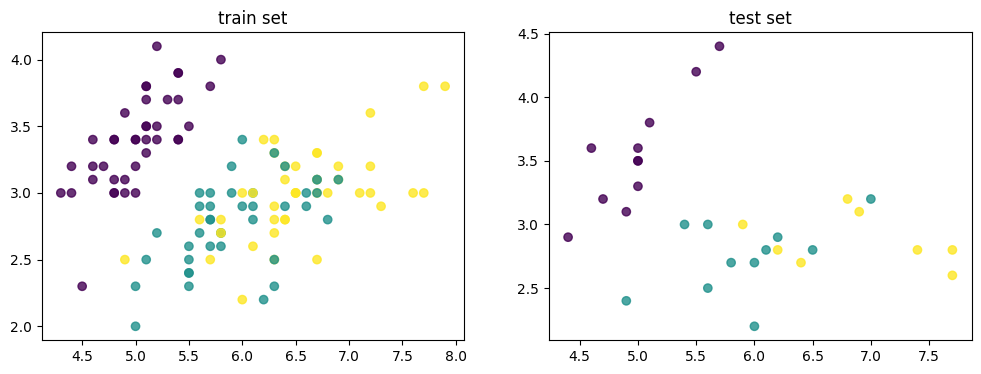

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('test set')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=1) #build our knn classifier

model.fit(X_train,y_train) #Training KNN classifier
print('train score:', model.score(X_train, y_train))
#print('test score:', model.score(X_test, y_test))

train score: 1.0


In [ ]:
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9


In [ ]:
#Cross validation
from  sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(KNeighborsClassifier(4),X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

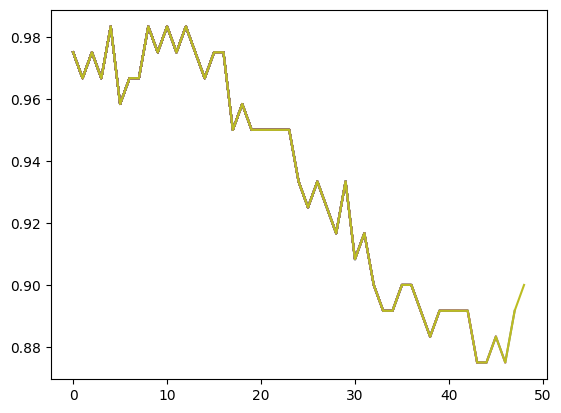

In [ ]:
#Pour éviter de changer à chaque iteration la valeur de K, on utilise une bonne for
val_score = []
for k in range(1,50):
  score = cross_val_score(KNeighborsClassifier(k),X_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(score)
  plt.plot(val_score)

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
#Alors il existe une fonction validation curve qui ne permet de pas utiliser la boucle for
#Validation curve
model =KNeighborsClassifier()
k = np.arange(1,50)

#val_score.shape
#val_score.mean()


In [ ]:
train_score, val_score = validation_curve(model, X_train, y_train, k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.ylabel('n_neighbors')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#pour teser tout les combinaisons on utilse GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,20),
            'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_score_

0.9833333333333334

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [ ]:
model.score(X_test, y_test)

0.9

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 10]])

[19 27 36 44 53 61 70 78 87 96]


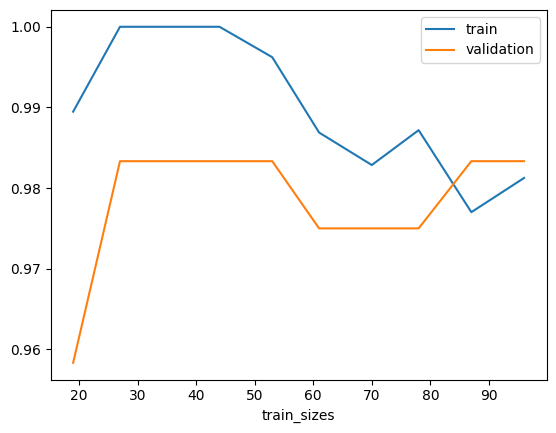

In [ ]:
# Learning curve : courbe d'apprentissage
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2,1.0, 10), cv=5)

print(N)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
np.linspace(0.2,1.0, 5)

array([0.2, 0.4, 0.6, 0.8, 1. ])